# 부스팅boosting 분석
#### <img src='../img/boosting.png' width='85%'>
- 배깅처럼 무작위로 표본을 추출해서 분석하는 것보다 약간의 가능성이 높은 규칙들을 결합시켜 보다 정확한 예측모델을 만들어 내는 것을 의미
    - 즉, 약한 모델 여러개를 결합시켜 강한 모델을 만들어 냄
- 배깅은 여러 분류기를 병렬적으로 연결해서 각 분류기로 부터 얻어진 결과를 한번에 모두 고려
    - => 각 분류기가 학습시 상호 영향을 주지 않음

- 부스팅은 순차적으로 연결해서 전 단계 분류기의
- 결과가 다음 단계 분류기의 학습과 결과에 영향을 미침

    - AdaBoost      : 가중치 기반 부스팅 기법
    - Gradientboost : 잔여오차 기반 부스팅 기법
    - XGBoost       : GB 개량 부스팅 기법 (추천!)
    - LightGBM      : XGB 개량 부스팅 기법 (추천!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier, BaggingClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [1]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 422.2 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


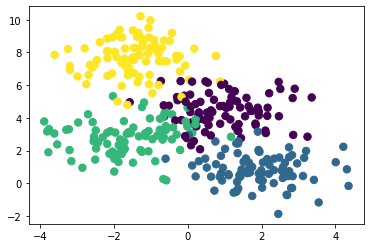

In [5]:
# 테스트용 데이터 생성
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

# 데이터 분할
x_train, x_test, y_train, y_test = \
    train_test_split(X, y,
                     random_state=2209021005)

# AdaBoosting 분석 실행

In [7]:
# learning_rate : 학습률
# 가중치 부여 알고리즘
# SAMME.R : soft votting 방식의 가중치 부여 (확률)
# SAMME   : hard votting 방식의 가중치 부여 (값)

adclf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                           n_estimators=100, learning_rate=0.5,
                          algorithm='SAMME.R')
adclf.fit(x_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=100)

In [8]:
adclf.score(x_train, y_train)

1.0

In [9]:
pred = adclf.predict(x_test)
accuracy_score(y_test, pred)

0.875

/opt/miniconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<AxesSubplot:>

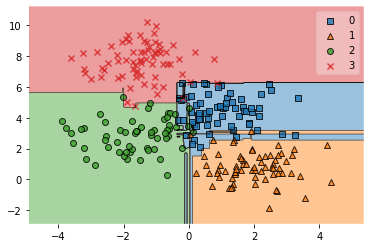

In [10]:
# 결정영역 시각화
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, adclf)

# Gradientboost 분석 실행

In [14]:
gbclf = GradientBoostingClassifier(max_depth=3,
                           n_estimators=100)
gbclf.fit(x_train, y_train)

GradientBoostingClassifier()

In [12]:
gbclf.score(x_train, y_train)

1.0

In [13]:
pred = gbclf.predict(x_test)
accuracy_score(y_test, pred)

0.8636363636363636

In [14]:
# 결정영역 시각화
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, gbclf)

# XGBoost 분석 실행
- 캐글 데이터분석 경진대회 우승자들이 자주 사용했던 분석 기법
- GBM 분석기법 대비 속도와 성능을 향상시킴

- XGBoost 핵심 라이브러리는 C/C++로 작성됨
    - 따라서, sklearn에서 연동하려면 래퍼클래스wrapper class를 사용해야 함

- xgboost.readthedocs.io

- 설치하기 (2020.01.31 기준 v0.90)
    - pip3 install xgboost

In [26]:
xgbclf = XGBClassifier(tree_method='hist', max_depth=4)
xgbclf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [27]:
xgbclf.score(x_train, y_train)

1.0

In [28]:
pred = xgbclf.predict(x_test)
accuracy_score(y_test, pred)

0.8863636363636364

/opt/miniconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<AxesSubplot:>

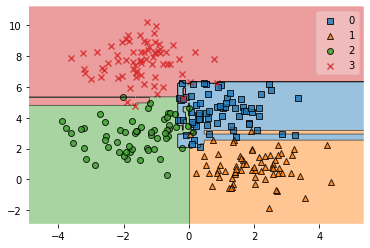

In [29]:
# 결정영역 시각화
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, xgbclf)

# LightGBM 분석 실행
- 부스팅 계열 분석 알고리즘에서 가장 각광을 받고 있음

- XGB는 다른 알고리즘보다 성능이 좋지만 느리고 메모리를 많이 사용한다는 단점 존재
- 그에 비해 LGB는 속도도 빠르고 메모리도 적게 먹음
- 즉, XGB의 장점은 수용하고 단점은 보완한 알고리즘임

- lightgbm.readthedocs.io

- 설치하기 (2020.01.31 기준 v2.3.1)
    - pip install lightgbm

In [30]:
lgbclf = LGBMClassifier()
lgbclf.fit(x_train, y_train)

LGBMClassifier()

In [31]:
lgbclf.score(x_train, y_train)

1.0

In [32]:
pred = lgbclf.predict(x_test)
accuracy_score(y_test, pred)

0.8636363636363636

/opt/miniconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<AxesSubplot:>

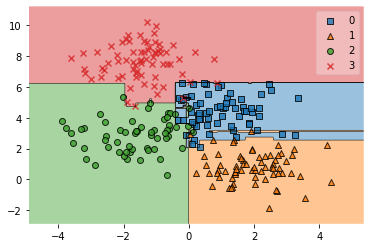

In [33]:
# 결정영역 시각화
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, lgbclf)